# Predicting Employee Churn with Decision Trees in Python 
***
## Introduction to HR Analytics and the Project Overview
***

Among all of the business domains, HR is still the least disrupted. However, the latest developments in data collection and analysis tools allow for data-driven decision making in all dimensions including HR. Since People analytics is a rapidly growing field, it is the right time to tap into that industry.

## What is People Analytics?

People analytics, also known as HR analytics, is a data-driven approach to managing people at work.

There are many problems in HR that can be addressed using data-driven approach. Among those are decisions related to employee hiring and retention, performance evaluation, collaboration and else. 

* Hiring/Assessment
* Retention
* Performance evaluation
* Learning and Development
* Collaboration/team composition
* Other (e.g. absenteeism)

In this project, we will concentrate on **Predicting employee turnover**, which is related to the first 2 bullet points: **Hiring and retention.**

## Main topic: Employee turnover
Employee turnover is the process of employees leaving the company, also known as employee attrition or employee churn. **When skilled employees leave, this can be very costly for the company, thus firms are interested in predicting turnover beforehand.** Having that information in hand, **companies can change their strategy to retain good workers or start the hiring process of new employees on time.**

* Employee turnover is the process of employees leaving the company.
* Also known as employee attrition or employee churn.
* May result in high costs for the company.
* May affect company's hiring or retention decisions. 

## Dataset

In this project, we will use **a sample employee dataset** with variables **that describe employees in the company to predict their turnover and understand what are the most important features affecting it.** 

## Table of contents
The first chapter will concentrate on descriptive analytics, where we will transform the dataset and make it ready for developing the predictive model. In the second chapter we will develop an initial model that will then be tuned and improved in the third chapter. The final chapter will introduce techniques that will allow selection of the best model for decision-making.

**Chapter 1. Cleaning the dataset and Descriptive analytics** <br>
**Chapter 2. Model development: Predicting employee turnover**<br>
**Chapter 3. Evaluating the turnover prediction model**<br> 
**Chapter 4. Selecting the best turnover prediction model**

---

# Chapter 1. Make it Descriptive for Predictive

## Finding categorical variables
Categorical variables are variables that receive a limited number of values that describe a category. They can be of two types:

* **Ordinal** variables have two or more **categories which can be ranked or ordered** (e.g. low, medium, high)
* **Nominal** variables have two or more **categories that do not have an intrinsic order** (e.g. men, women)

In this exercise, we will find the categorical variables in the dataset. First of all, we will import the `pandas` library and read the CSV file called `turnover.csv`. Then, after viewing the first 5 rows and learning (visually) that there are non-numeric values in the DataFrame, we will get some information about the types of variables that are available in the dataset.

In [73]:
# Import pandas (as pd) to read the data
import pandas as pd

# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("datasets/turnover.csv")

# Take a quick look to the first 5 rows of data
print(data.head())

# Get some information on the types of variables in data
data.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 column

We have two columns of type object, `department` and `salary`, which are actually categorical. Let’s explore these in more details.

## Observing categoricals
In our dataset, we have two columns of type object, department and salary, which are actually categorical.
* `salary` is an ordinal variable
* `department` is a nominal variable

Let's print the unique values of those variables.

In [74]:
# Print the unique values of the "department" column
print(data.department.unique())

# Print the unique values of the "salary" column
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


## Encoding categories for the `salary` variable

We need to help our algorithm understand that we're dealing with categories. We will encode categories of the `salary` variable, which is *ordinal* based on the values observed:

1. First, we have to tell Python that the salary column is actually categorical.
2. Then, we specify the correct order of categories.
3. Finally, we should encode each category with a numeric value corresponding to its specific position in the order.

In [75]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes

Now, our salary column is now encoded as an ordered category, and optimized for our prediction algorithm!<br>

| **Old values** | **New values** |
|:--------------:|:--------------:|
|       low      |        0       |
|     medium     |        1       |
|      high      |        2       |

## Getting dummies for the `department` variable
We will now transform the `department` variable, which is *nominal* based on the values observed. To do that, we will use so-called dummy variables.

1. `get_dummies()` out of the department column of the data and save them inside a new DataFrame called `departments`.
2. Take a quick look at the first 5 rows of the new DataFrame called `departments`.

In [76]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


**There are 10 departments** in the dataset, so we now get **10 columns**. The first five rows in the dataset refer to people working in the `sales` department, so we get values equal to 1 in the department column, and values equal to 0 in the others.

## Dummy trap

A dummy trap is **a situation where different dummy variables convey the same information.** In this case, if an employee is from the accounting department (i.e. value in the `accounting` column is 1), then you're certain that s/he is not from any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking at all the other departments.

For that reason, whenever *n* dummies are created (in our case, 10), only *n-1* (in our case, 9) of them are enough, and the *n*th column's information is already included.

Thus, we will get rid of the old department column, drop one of the department dummies to avoid dummy trap, and then join the two DataFrames.

In [77]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)

Notice that in the new data DataFrame, the `department` column has disappeared, being replaced by a column for each department except `accounting`.

In [78]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


## Turnover rate: Percentage of employees who churn
The column `churn` is providing information about whether an employee has left the company or not is the column churn:

* if the value of this column is **0, the employee is still with the company.**
* if the value of this column is **1, then the employee has left** the company.


Let’s calculate the turnover rate:
1. Count the number of times the variable churn has the value 1 and the value 0, respectively.
2. Divide both counts by the total, and multiply the result by 100 to get the percentage of employees who left and stayed.

In [79]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts())

# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


So, the **turnover rate** is **around 24%**. To be specific, **11,428 employees stayed**, which accounts for **about 76% of the total employee** count. On the other hand, **3,571 employees left**, which accounts for about **24% of them.**

## Correlations in the employee data

Next, we want to know **the variables that are in a positive or negative linear relationship with our target.** To see that, we will first of all develop the correlation matrix using the `corr()` method provided by *pandas* and then visualize the matrix using the `heatmap()` function by `seaborn`, a statistical visualization library. 

The heatmap illustrates that our target varaible `churn` has the highest negative correlation with `satisfaction` level. **That is, the increase in satisfaction level is associated with decrease in probability of turnover.**

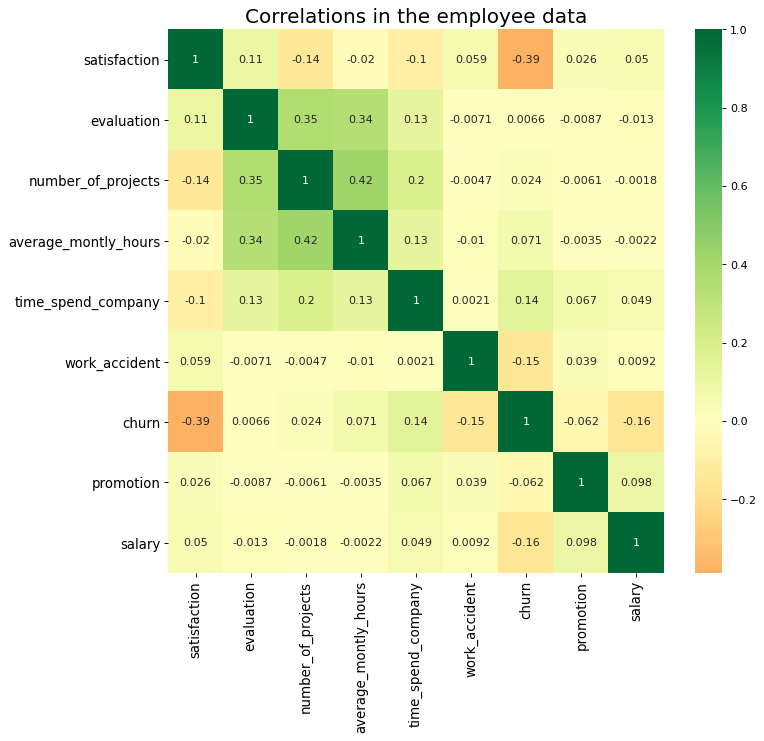

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9), dpi= 80)
features=list(['satisfaction','evaluation','number_of_projects','average_montly_hours','time_spend_company','work_accident','churn','promotion','salary'])
corr_matrix = data[features].corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix, yticklabels=corr_matrix, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlations in the employee data', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can also see that 
* The relationship between `evaluation` and `work_accident` is negative.
* There is a negative correlation between employee satisfaction and churn.
* Increase in the `number_of_projects` is associated with an increase in `average_monthly_hours`.

---

# Chapter 2. Model development: Predicting employee turnover

### Part 1. Separating Target vs. Features
For now we already know how to transform HR data and make it ready for predictive analytics. **Let's now concentrate on predictive component.** In business analytics or data science terminology, the variable that one aims to predict is known as target, while everything else that is used for prediction are called features. In other words, we will be using features to predict target. Our target is to predict employee turnover using data that we have on them. 

* **Target**: the dependent variable that we aim to predict. (e.g. Employee churn)
* **Feature**: independent variables, i.e. everything else that is used for prediction. We use features to predict target.

In [81]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

### Splitting employee data: Train set vs Test set with `sklearn`
**To make an accurate prediction and build an algorithm that can be useful in reality, in analytics it is a usual practice to split the data into two components: train and test.** Train component is used to conduct calculations, optimizations and develop the algorithm, while the remaining test component is used to validate it.

* **Train**: the component used to conduct calculations, optimizations, and develop the algorithm .
* **Test**: the component used to validate the model.

**For that reason, once our data is separated into target and features, the next step is to split both of them into train and test component.** One of most popular Python libraries, that is widely used by data scientists and business analysts is called `sklearn`. In `sklearn`, there is almost always a built-in function for most of the analytics tasks, including train/test splitting. As you can see from the code, the function generates four outputs. This happens because we split between train and test both target and features so we end up with train and test components for target, and similarly for features. 

In [82]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

Last but not least, as you can see the functions takes a `test_size` argument which is **0.25** in our example. This argument tells `sklearn` to **randomly choose 25% of the data and save it as test, while the rest of 75% will be kept for training.** In general, when you have quite a big dataset with millions of observations, around 2-3% for test might be enough. **However, since our datasets in HR are not usually that big, 25% for test seems to be a good practice.**

### Overfitting
To understand better the reasoning behind train/test split, let's shortly cover the concept of overfitting. Overfitting is one of the most popular problems in analytics. Our first target is to have an accurate model that can helps us to make accurate predictions and decisions based on them. **Yet, a model which is accurate on one data, might not be that much accurate on the other. Overfitting happens, when the model works well on the dataset it was developed on, but is not useful outside of it.**

* **Overfitting**: an error that occurs when model works well enough for the dataset it was developed on (train), but fails to generalize outside of it (test).

To make sure that we achieve a model that is **generalizable**, or in other words, **works good** not only **our current dataset** but also **in possible future datasets**, we need to take the following steps:

**1. We split the data into train and test components.**<br>
**2. Develop model on train.**<br>
**3. Validate it on test to make sure our model is not overfitting the training data.**

---

## Part 2. Introduction to Decision Tree classification

We will start the process of building the predictive algorithm. **The purpose of this algorithm** is **1) to learn the important variables affecting the decision of leaving the company**, and **2)to use that information to predict turnover.** **Since the values our target (employee turnover) gets are 1 and 0**, so this problem is called ***binary* classification.**

## Decision Tree Classification

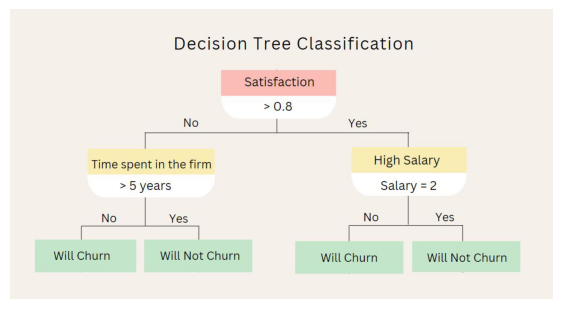

In [83]:
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

# Load the image
img = mpimg.imread('image/Decision-Tree.JPG')
plt.figure(figsize=(7,5), dpi= 100)
plt.axis('off')
plt.imshow(img)
plt.show()

The picture is the visualization of a sample Decision Tree for employee turnover.Let's go step by step over the tree to understand the classification process. 
* The tree is growing first starting from the variable `Satisfaction`. It is checked whether for a given employee the satisfaction level was higher than 0.5 or not. If it was, we go to the right branch of the tree, otherwise we move to the left one. 
* If we moved to the right, then the next question we need to ask according to the tree is whether `Salary` is High or not. If Salary is High, then we reach one of the last nodes or leaves of the tree, where the output is that the employee will not Churn. 
* Thus we have a decision path: employees with **High Satisfaction level and High Salary** do **NOT Churn**. 

Analogically, employees with low satisfaction level who spent, say 3 years with the company do Churn as presented by the last leaf of the leftmost branch of the tree. Therefore, **once we have this tree, we can easily predict whether a given employee will churn or not and also understand what are the important variables that drive churn decision.**

## Decision tree splitting: Hypothetical example
Total set: 100 observations, 40 left, 60 stayed
* Gini: `2*0.4*0.6 = 0.48`

Splitting rule: satisfaction > 0.8
* **Above 0.8 Satisfaction** (Left Branch with YES): 50 people - *all stayed*
* Gini: `2*1*0 = 0`

* **Below 0.8 Satisfaction** (Right Branch with NO): 50 people - *40 left and 10 stayed*
* Gini: `2*0.4*0.1 = 0.08`

This hypothetical splittion results in tremendously decreased Gini: from 0.48 to 0 and 0.08 in two branches respectively. As a result, we have purer samples, especially in the left branch, where we have only stayers, which helps us to make more accurate predictions.

## Computing Gini index
**The decision tree algorithm aims to achieve partitions in the terminal nodes that are as *pure* as possible.** The Gini index is one of the methods used to achieve this. It is calculated based on the proportion of samples in each group.

Given the number of people who stayed and left respectively, let's calculate the Gini index for that node.
* Calculate the total number of employees in that node.
* Compute the Gini index based on proportion of employees in each group.

In [84]:
# number of people who stayed/left
stayed = 37
left = 1138

# sum of stayed and left
total = stayed + left

# gini index
gini = 2*(left/total)*(stayed/total)

## Splitting the tree
Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.
* Check which Gini is lower.
* If A has lower Gini, split by A, else, split by B.

In [85]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# Check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


---

## Part 3. Predicting employee churn using `DecisionTreeClassifier`

## Fitting the tree to employee data
A train/test split provides the opportunity to develop the classifier on the training component and test it on the rest of the dataset. **We will start developing an employee turnover prediction model using the decision tree classification algorithm.** The algorithm provides a `.fit()` method in order to fit the features to the model in the training set.

In [86]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

## Checking the accuracy of prediction
It's time to check how well our trained model can make predictions! Let’s use test testing set to check the accuracy of our Decision Tree model, with the `score()` method.

In [87]:
# Check the accuracy score of the prediction for the training set
trainscore = model.score(features_train, target_train)*100

# Check the accuracy score of the prediction for the test set
testscore = model.score(features_test,target_test)*100

print(f"train score: {trainscore}, test score: {testscore}")

train score: 100.0, test score: 97.22666666666666


As expected, our algorithm did perfectly on the training set (the accuracy of 100%). On the testing set, it was able to correctly predict if an employee would leave or not in almost 98% of the cases! 

---

## Part 4. Interpretation of the decision tree

## Exporting the tree for Visualization
In Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, we have overfitting in our results. This can also be learned from the tree visualization. One of the main advantages of using Decision Tree algorithm, is that it is interpretable. **We can visualize the tree to understand the path taking us to the final decision.**

The visualization consists of 3 steps. 
1. First, one needs to export the tree. It will be exported into a file called `tree.dot` which will reside in the working directory, together with `turnover.csv` dataset file that we are using. 
2. Then you need to open the file and copy content. 
3. Last step is going to the webgraphviz website, pasting the content and visualizing the tree.

Here, we will export the decision tree into a text document, which can then be used for visualization.

In [88]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

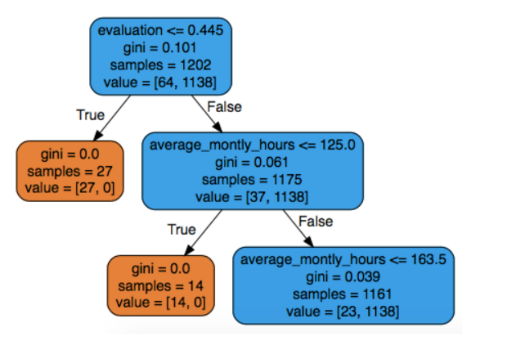

In [89]:
# Load the image
img2 = Image.open('image/cap.PNG')
plt.figure(figsize=(7,5), dpi= 90)
plt.axis('off')
plt.imshow(img2)
plt.show()

The above graph shows one of the branches of the tree. We can interpretate the graph as follows: 

* When `average_monthly_hours` is less than or equal to 125, complete purity is achieved. (the tree splits one last time and stops growing.)
* Impurity in the node with 1175 samples is lower than in the top node.
* The left branch of the tree achieves purity sooner than the right branch.

---

# Chapter 3. Evaluating the turnover prediction model

## Part 1. Fighting with overfitting

Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, **the growth of the decision tree is usually controlled by:**

* Limiting tree maximum depth: Pruning the tree and setting a limit on the maximum depth it can have.
* Limiting the minimum number of observations in leafs.

## Fight with overfitting: (1) Pruning the tree

In the below block, we limit the tree depth. This can easily be done by setting an additional parameter `max_depth=5` in the `DecisionTreeClassifier` during the initialization process. It will help us to keep everything else the same, but limit the tree to at most 5 levels to grow in depth.<br>

* Initialize `the DecisionTreeClassifier` while limiting the depth of the tree to 5.
* Fit the Decision Tree model using the `features` and the `target` in the training set.
* Check the accuracy of the predictions on both the training and test sets.

In [90]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# The accuracy of the prediction for the training set
depth5_test = model_depth_5.score(features_train,target_train)*100

# The accuracy of the prediction for the test set
depth5_train = model_depth_5.score(features_test,target_test)*100

print(f"trainset accuracy: {depth5_test}, testset accuracy: {depth5_train}")

trainset accuracy: 97.71535247577563, testset accuracy: 97.06666666666666


As a result, the accuracy is decreased on both sets, but **the difference between them is negligible, which means we reduced overfitting and current model is more realistic.**

## Fight with overfitting: (2) Limiting the sample size

Another method to prevent overfitting is to specify the minimum number of observations necessary to grow a leaf (or node), in the Decision Tree. In this block, we implement everything absolutely the same, apart from the model initialization step again: this time we set `min_sample_leaf=100` to limit the sample size inside a leaf.

* Set this minimum limit to 100
* Fit the new model to the employee data
* Examine prediction results on both training and test sets

In [91]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# The accuracy of the prediction (in percentage points) for the training set
sample100_train = model_sample_100.score(features_train,target_train)*100

# the accuracy of the prediction (in percentage points) for the test set
sample100_test = model_sample_100.score(features_test,target_test)*100

print(f"trainset accuracy: {sample100_train}, testset accuracy: {sample100_test}")

trainset accuracy: 96.57747355320473, testset accuracy: 96.13333333333334


After fitting and scoring this new model, we receive a test accuracy of 96.13% which is again lower, but more realistic than the old one.

---
## Part 2. Calculating accuracy metrics

Before now, we were using only general accuracy score to evaluate the performance of our model. However, it turns out only accuracy is not enough to claim that the model is a good one. <br>

To understand what other metrics of evaluation are doing, let me introduce you to prediction errors first. We have two possible outcomes in reality, which means, in general, we have 4 possible situations presented in this so called **confusion matrix**. Based on this 4 possibilities, many different metrics are developed in analytics to measure performance of the model.

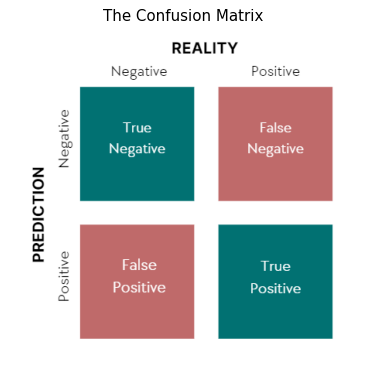

In [92]:
# Load the image
img3 = Image.open('image/Confusion Matrix.PNG')
plt.figure(figsize=(5,5), dpi= 90)
plt.title('The Confusion Matrix')
plt.axis('off')
plt.imshow(img3)
plt.show()

***
$\mathbf{\text{Performance measure metrics}}$<br>
***
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$
$$Specificity = \frac{TN}{TN+FP}$$
$$Preicision = \frac{TP}{TP+FP}$$
$$TPR = Sensitivity = \frac{TP}{TP+FN}$$
$$FPR = 1-Specificity = \frac{FP}{TN+FP}$$


### (1) Precision Score: Focus on FP

If we are interested in learning what is the percentage of people who **truly left** the company among those who were **predicted to leave**, then **Precision score** will be handy to use. **The reason those scores are important is that general accuracy is not providing information about separate classes.** For example, in our model around 76% are stayers. So if we just say "everybody is staying" we will have 76% accurate prediction. But in terms of recall, we will have very low value, as everybody who churned will be wrongly classified.

### If target is leavers, we may focus on FP:
* **Preicison score = TP / (TP + FP)**
* Lower FP, Higher Precision score.
* Precision score: % of leavers in reality, among those predicted to leave.

In [93]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)*100

92.40641711229947

### (2) Specificity score: Focus on FP
One the other hand, if you want to keep your **attention on those who stay**, less False Positives will be your target, which can be achieved with higher **Specificity score.**

### If target is stayers, focus on FP:
* **Specificity = TN / (TN + FP)**
* Lower FP, Higher Specificity
* Specificity - % of correct predictions amongs stayers.

### (3) Recall score: Focus on FN
If the target of predictions is mostly to **focus on those who are churning**, then we want to have less False Negatives, people who **leave in reality but your algorithm is unable to predict it**. For that reason, **Recall score** can be useful. Higher values of recall correspond lower values of False Negatives.<br>

### If target is leavers, focus on FN:
* **Recall score = TP / (TP + FN)**
* Lower FN, Higher Recall score
* Recall score: % of correct predictions among leavers.

In [94]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)*100

96.32107023411372

---
## Part 3. Targeting both leavers and stayers

### AUC score: keeping an eye on recall and specificity at the same time
If our target are leavers, we would concentrate on recall, if stayers, then on specificity. But **if the target is to have good predictions on both, then probably the best choice is to use AUC score.** 

* Area Under Curve (AUC): a compound measure that is maximized when both recall and specificity are maximized.
* Place Recall **(TPR) on vertical**, and 1- Specificity **(FPR) on horizontal axis**. 
* Draw the **ROC (Receiver Operating Characteristic)** curve, illustrating the performance of a binary classification model by plotting **the "trade-off" between its true positive rate (sensitivity) and false positive rate (1 - specificity)** across different classification thresholds.
* AUC score: The area between ROC and the black diagonal line that a random prediction could obtain.

Using AUC as a target to maximize, the model will try to correctly classify both 1s and 0s keeping an eye on recall and specificity at the same time.

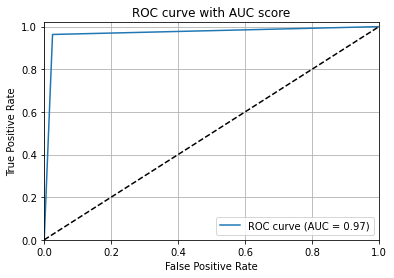

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
auc_score = roc_auc_score(target_test, prediction)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(target_test, prediction)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve with AUC score')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

---
## Part 4. Class imbalance

General accuracy score is a good choice only if classes in the dataset are balanced. However,**class imbalance** may lead to **higher accuracy score, when in fact our model is failing to correctly predict churn.** This was the reason we covered evaluation metrics other than accuracy score. While those other metrics are more robust and informative, they only partially solve the class imbalance problem. **To solve it**, what we can do is **to change prior probabilities.**<br>

**Gini index** was **the objective of our Decision tree to minimize and it was calculated based on probability of being 1 or 0.** As we have **no other information about probabilities**, in the very beginning, when the **tree just starts to grow**, in order to calculate the Gini index, it **takes proportions of 0s and 1s as probabilities in Gini formula.** **As a result, Class 0, which are stayers, becomes more influential as they are 76% of the observations in our dataset.** This is the reason, our algorithm was able to correctly predict 0s but not 1s. <br>

**To solve it, we just need to tell Python to balance class weights which will make probability of both being 0 and 1 equal to 50%.** This will probably negatively affect the general accuracy as a result of increased Gini, but AUC and especially Recall should probably be improved, as now both classes are equally important.


| **Without balance** | **With balanec** |
|:--------------:|:--------------:|
|       $P_0$ = 0.76      |        $P_0$ = 0.5       |
|     $P_1$ = 0.24     |        $P_1$ = 0.5      |
|      $Gini$ = 0.36      |        $Gini$ = 0.5      |

## Balancing classes
It can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. To solve the imbalance, equal weights are usually given to each class. Using the `class_weight` argument in sklearn's `DecisionTreeClassifier`, one can make the classes become `balanced`.

Let’s correct our model by solving its imbalance problem:

* First, we set up a model with balanced classes.
* Then, fit it to the training data.
* Lastly, check its accuracy on the test set by printing the accuracy `score` of the prediction (in percentage points) for the thest set. 

In [96]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(f"Accuracy of Balanced model: {model_depth_5_b.score(features_test,target_test)*100:.2f}%")

Accuracy of Balanced model: 93.71%


## Comparison of Employee attrition models
Our next task is **to compare the balanced and imbalanced (default) models** using the pruned tree (`max_depth=7`). The imbalanced model is already done using recall and ROC/AUC scores. Lets' complete the same steps for the balanced model.

* Initialize the balanced model, setting its maximum depth to 7, and its seed to 42.
* Fit it to the training component using the training set.
* Make predictions using the testing set.
* Print the recall score and ROC/AUC score with `recall_score()` and `roc_auc_score()`.

In [97]:
# Print the recall score
print(f"Imbalanced model's recall score: {recall_score(target_test,prediction)*100:.2f}%")
# Print the ROC/AUC score
print(f"Imbalanced model's ROC/AUC score: {roc_auc_score(target_test,prediction)*100:.2f}%")

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(f"Balanced model's recall score: {recall_score(target_test, prediction_b)*100:.2f}%") 
# Print the ROC/AUC score for the balanced model
print(f"Balanced model's recall score: {roc_auc_score(target_test, prediction_b)*100:.2f}%") 

Imbalanced model's recall score: 96.32%
Imbalanced model's ROC/AUC score: 96.92%
Balanced model's recall score: 93.20%
Balanced model's recall score: 95.99%


---
# Chapter 4. Choosing the best turnover prediction model

### In this final chapter, 
1. We learn how to use cross-validation to avoid overfitting the training data. 
2. We learn how to know which features are impactful, and which are negligible. 
3. We use these newly acquired skills to build a better performing Decision Tree!

## Part 1. Cross-validation using `sklearn`

As explained in Chapter 2, overfitting the dataset is a common problem in analytics. This happens when a model has learned the data too closely: it has great performances on the dataset it was trained on, but fails to generalize outside of it. <br>

While the train/test split technique we used in Chapter 2 ensures that the model does not overfit the training set, **hyperparameter tuning** may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, **it is recommended to validate the model on different testing sets.** **K-fold cross-validation** allows us to achieve this: <br>

* It splits the dataset into a training set and a testing set
* It fits the model, makes predictions and calculates a score (we can specify if we want the accuracy, precision, recall etc)
* It repeats the process k times in total
* It outputs the average of the 10 scores <br>

In this exercise, we will use Cross Validation on our dataset, and evaluate our results with the `cross_val_score function`.

In [98]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


## Setting up GridSearch parameters
A hyperparameter is a parameter inside a function. For example, `max_depth` or `min_samples_leaf` are hyperparameters of the `DecisionTreeClassifier()` function. **Hyperparameter tuning is the process of *testing different values of hyperparameters to find the optimal ones*: the one that gives the best predictions according to your objectives.** In `sklearn`, you can use **GridSearch** to test different combinations of hyperparameters. Even better, you can use `GridSearchCV()` to test different combinations and run cross-validation on them in one function!

In this exercise, we are going to prepare the different values you want to test for `max_depth` and `min_samples_leaf`. We will then put these in a dictionary, because that’s what is required for `GridSearchCV()`:

* The dictionary keys will be the hyperparameters names
* The dictionary values will be the attributes (the hyperparameter values) you want to test

Instead of writing all the values manually, we will use the `range()` function, which allows us to generate values incrementally. For example, `range(1, 10, 2)` will generate a list containing values ranging from 1 included to 10 not included, by increments of 2. So the final result will be `[1, 3, 5, 7, 9]`.

In [99]:
# Generate values for maximum depth, ranging from 5 to 20 with increments of 1
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size with values from 50 to 450 with increments of 50
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

## Implementing GridSearch
We can now use the sklearn `GridSearchCV()` function to find the best combination of all of the `max_depth` and `min_samples_leaf` values we generated in the previous exercise.

* Import the `GridSearchCV` function
* Apply a `GridSearchCV()` function to our model using the parameters dictionary we defined earlier. Save this as `param_search`.
* Fit `param_search` to the **training** dataset.
* Print the best parameters found using `best_params_` attribute.

In [100]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


---
## Part 2. Important features for predicting attrition

One of the main reasons we chose to use **Decision Tree algorithm** is that it **provides interpretability**. We can not only visualize and explain it, but we can also **understand what are the important features that drive the decision to leave the company.**<br>

Fortunately, once Decision Tree is developed, `sklearn` can easily calculate feature importances. The latter is equal to the relative decrease in Gini due to the selected feature. Once the calculation is done for all features, the values are rescaled to sum up to 100%. As a result, **higher percentage** speaks about **the feature being more important**. Usually, results show that not all the features are that important. As a consequence, **if you learn that a feature is not important at all**, it is **suggested to drop it and run the model without that feature.**
* Importance is calculated as relative decrease in Gini due to the selected feature. 
* Importance are scaled to sum up to 100%.
* Higher percentage, Higher importance.

## Sorting important features

Among other things, Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but **Decision Trees can also quantify the effect of the different features on the target.** Here, it can tell you **which features have the strongest and weakest impacts on the decision to leave the company**. In `sklearn`, you can get this information by using the `feature_importances_` attribute. <br>

In this exercise, **we're going to 1) get the quantified importance of each feature, 2) save them in a pandas `DataFrame`, and 3) sort them from the most important to the less important.** The `model_ best` Decision Tree Classifier used in the previous exercises is available, as well as the `features_test` and `features_train` variables.

* Use the `feature_importances_` attribute to calculate relative feature importances.
* Create a list of features.
* Save the results inside a `DataFrame` using the `DataFrame()` function, where the features are rows and their respective values are a column.
* Sort the `relative_importances` DataFrame to get the most important features on top using the `sort_values()` function and print the result.

In [101]:
# Initialize the best model according to the previous GridSearchCV result 
model_best = DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=50, random_state=42)

# Fit it to the training component
model_best.fit(features_train,target_train)

# Make prediction using test component
prediction_best = model_best.predict(features_test)

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.453971
time_spend_company,0.397473
evaluation,0.104644
average_montly_hours,0.033545
number_of_projects,0.007103
technical,0.002226
hr,0.001038
promotion,0.000000
salary,0.000000
work_accident,0.000000


### It seems that `satisfaction` is by far the **most impactful feature on the decision to leave** the company or not.

## Selecting important features

In this exercise, we want to select **only the most important features** that will be used by the final model. Remember, that the relative importances are saved in the column importance of the DataFrame called `relative_importances`. <br>

* Select only the features with an importance value higher than 1%.
* Create a list from those features and print them.
* Using the index saved in `selected_list`, transform both `features_train` and `features_test` to include the features with an importance higher than 1% only.

In [102]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance > 0.01]

# create a list from those features
selected_list = selected_features.index
print(selected_list)

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

Index(['satisfaction', 'evaluation', 'average_montly_hours',
       'time_spend_company'],
      dtype='object')


### As a result, only 4 features have been retained out of the 17 original ones: 
`satisfaction`, `evaluation`, `average_montly_hours`, `time_spend_company`.

## Develop and test the best model

In Chapter 3, we found out that the following parameters allow you to get better model:

* `max_depth` = 5,
* `min_samples_leaf` = 50,
* `class_weight` = "balanced"

In this chapter, we discovered that some of the features have a negligible impact. We realized that we could get accurate predictions using just a small number of selected, impactful features. We updated our training and testing set accordingly, creating the variables `features_train_selected` and `features_test_selected`. <br>

With all this information at disposal, we're now going to develop the best model for predicting employee turnover and evaluate it using the appropriate metrics.

* Initialize the best model using the parameters provided in the description.
* Fit the model using only the selected features from the training set.
* Make a prediction based on the selected features from the test set.
* Print the accuracy, recall and ROC/AUC scores of the model.

In [107]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 50, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(f"General accuracy score: {model_best.score(features_test_selected, target_test) * 100:.2f}%")

# Print the recall score of the model predictions
print(f"Reall score: {recall_score(target_test, prediction_best) * 100:.2f}%")

# Print the ROC/AUC score of the model predictions
print(f"ROC/AUC score: {roc_auc_score(target_test, prediction_best) * 100:.2f}%")

General accuracy score: 93.47%
Reall score: 91.97%
ROC/AUC score: 92.95%


---
# 🚪 Outro

We have mastered predicting churn using Decision Trees. One thing that I would like to note here, is that although we concentrated on this model, Decision Trees are not the only choice to predict employee turnover. <br>

## Alternative methods
One very popular alternative used widely in HR analytics is Logistic Regression. You may still use Python and `sklearn` to make predictions with Logistic Regression using the evaluation metrics and approaches discussed in this project. While single Decision Tree is good, sometimes many is better. The tree based algorithms like Random Forest or Gradient Boosting usually provide better results than a single Decision Tree. <br>

**The reason we use single one, is that those complex models are not interpretable and cannot be visualized to make decisions using Decision path.** Last but not least, Neural networks are popular alternative nowadays for many prediction tasks including turnover prediction. However, they are considered a black box and do not provide the clue behind their predictions, which especially in HR is very important. 
* Logistic Regression
* Tree based algorithms: Random Forest, Gradient Boosting
* Neutral networks

As we have completed this project, now my suggestion would be to take some other HR datasets and attach your predictive skills on them following the same order of tasks that we have completed.